In [9]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.7 MB/s eta 0:00:00


In [10]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (30,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline

In [11]:
df = pd.read_csv(r'/content/exchange_rate.csv', index_col=0, parse_dates=True)
df

,Ex_rate
date,
01-01-1990 00:00,0.785500
02-01-1990 00:00,0.781800
03-01-1990 00:00,0.786700
04-01-1990 00:00,0.786000
05-01-1990 00:00,0.784900
...,...
06-10-2010 00:00,0.718494
07-10-2010 00:00,0.721839
08-10-2010 00:00,0.723197


In [12]:
df['Ex_rate']

,Ex_rate
date,
01-01-1990 00:00,0.785500
02-01-1990 00:00,0.781800
03-01-1990 00:00,0.786700
04-01-1990 00:00,0.786000
05-01-1990 00:00,0.784900
...,...
06-10-2010 00:00,0.718494
07-10-2010 00:00,0.721839
08-10-2010 00:00,0.723197


<Axes: xlabel='date', ylabel='Ex_rate'>

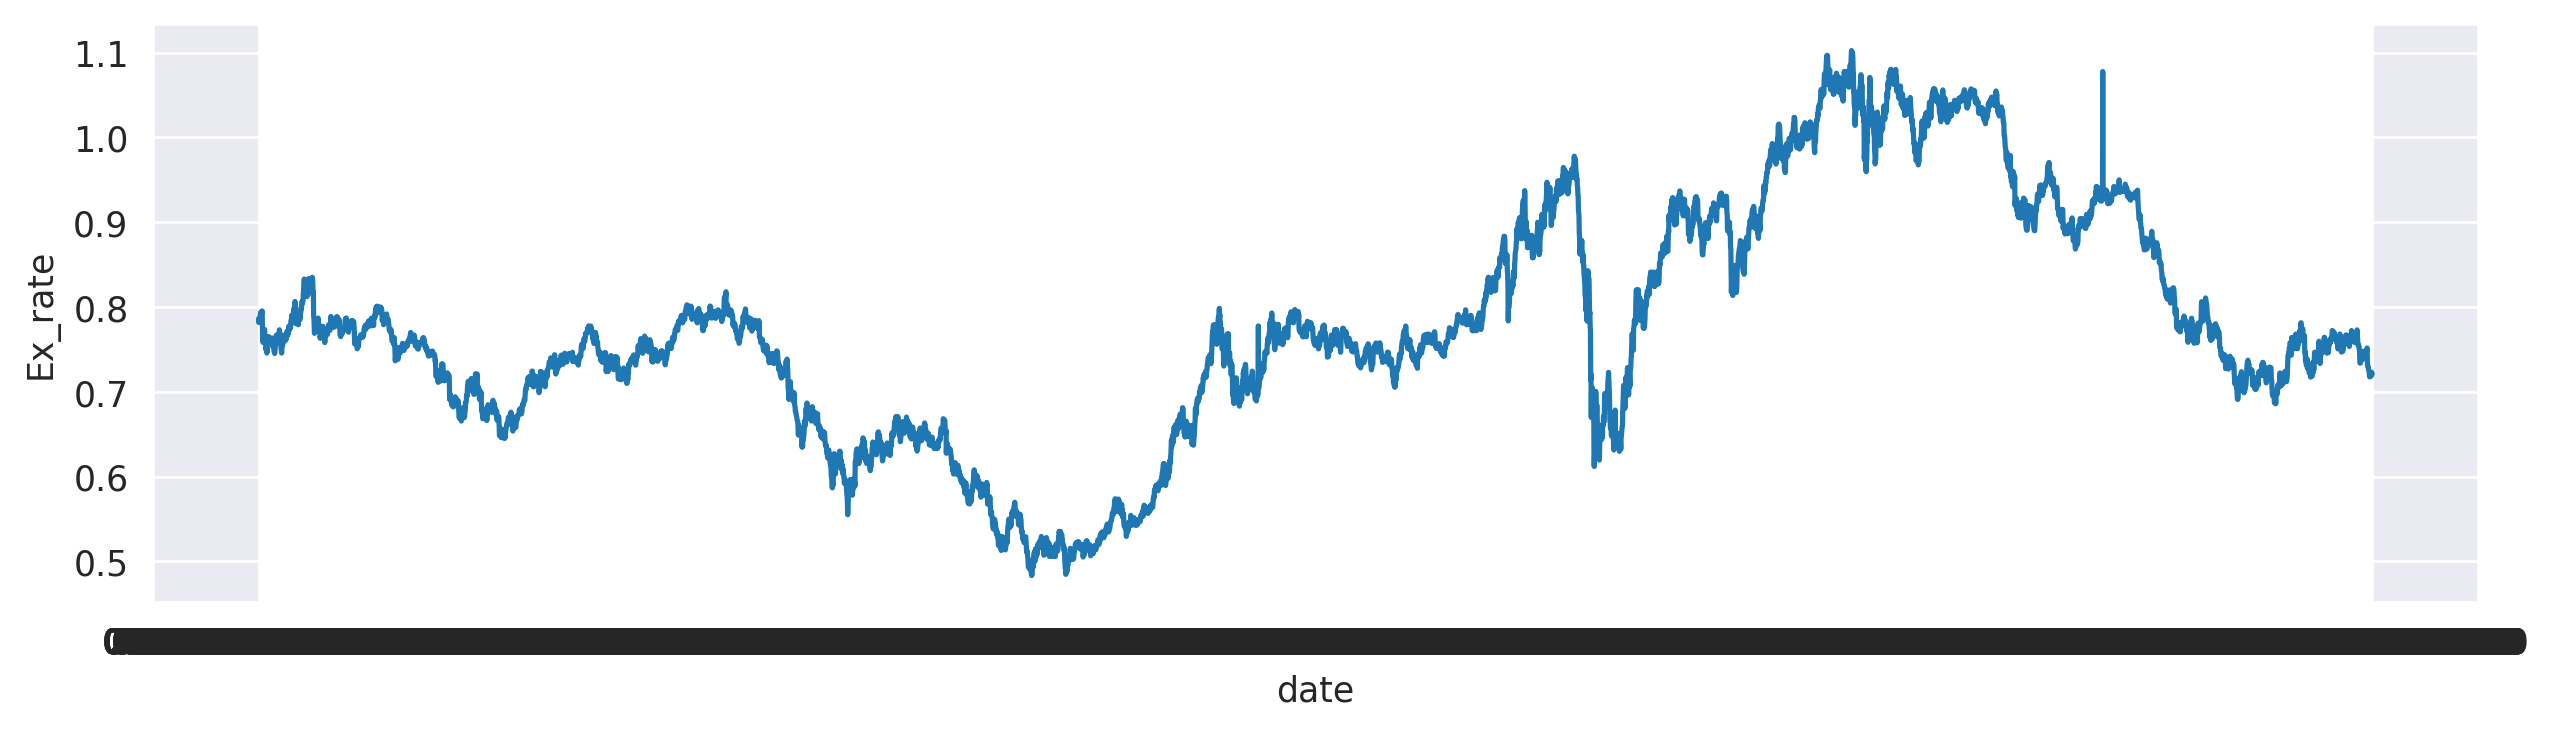

In [13]:
plt.figure(figsize=(12,3))
sns.lineplot(x="date",y="Ex_rate",data=df)

<Axes: xlabel='date'>

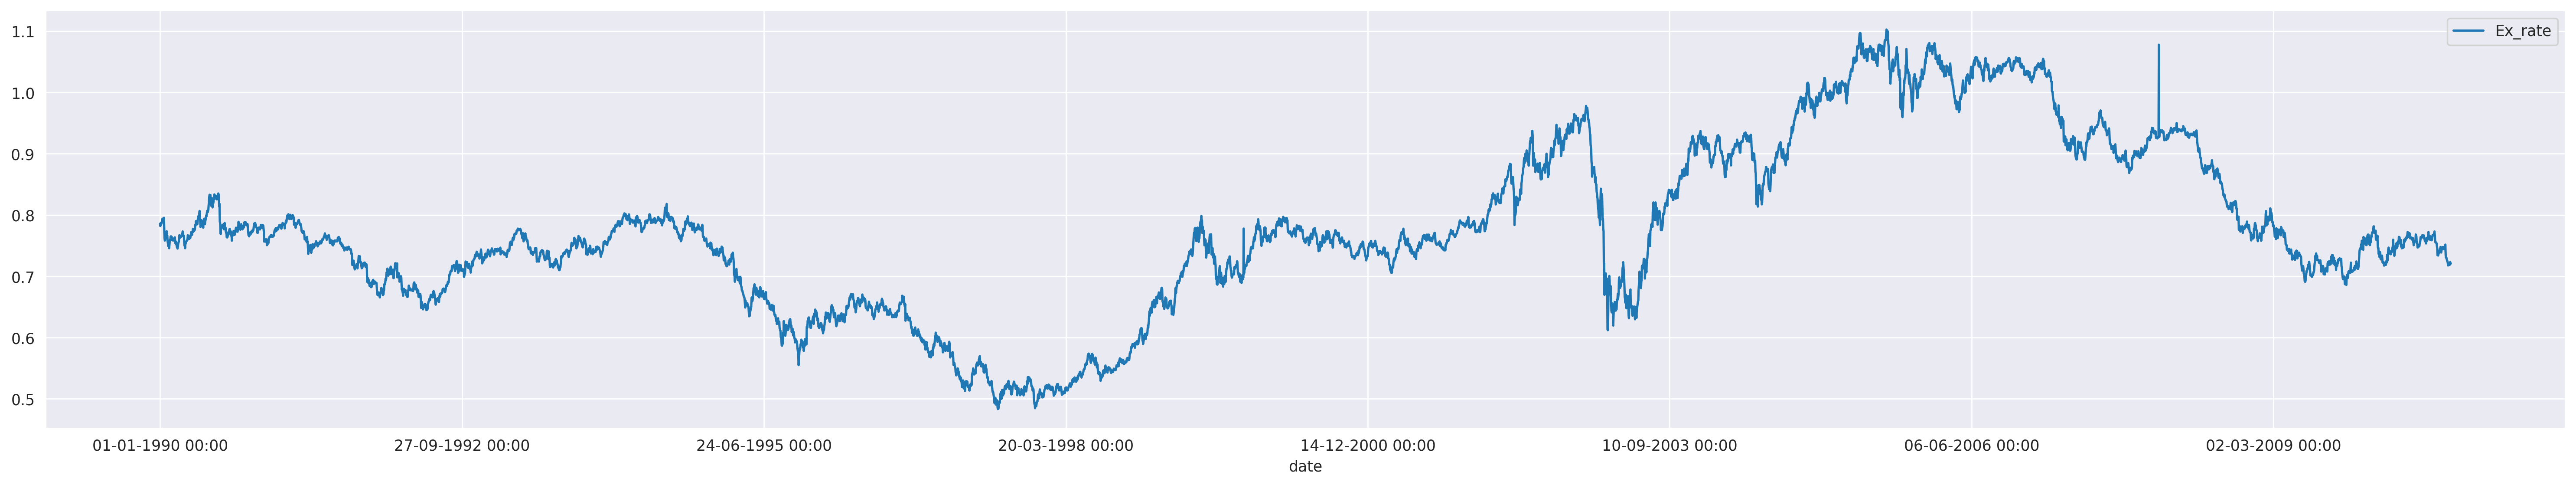

In [14]:
df.plot()

<Axes: xlabel='date'>

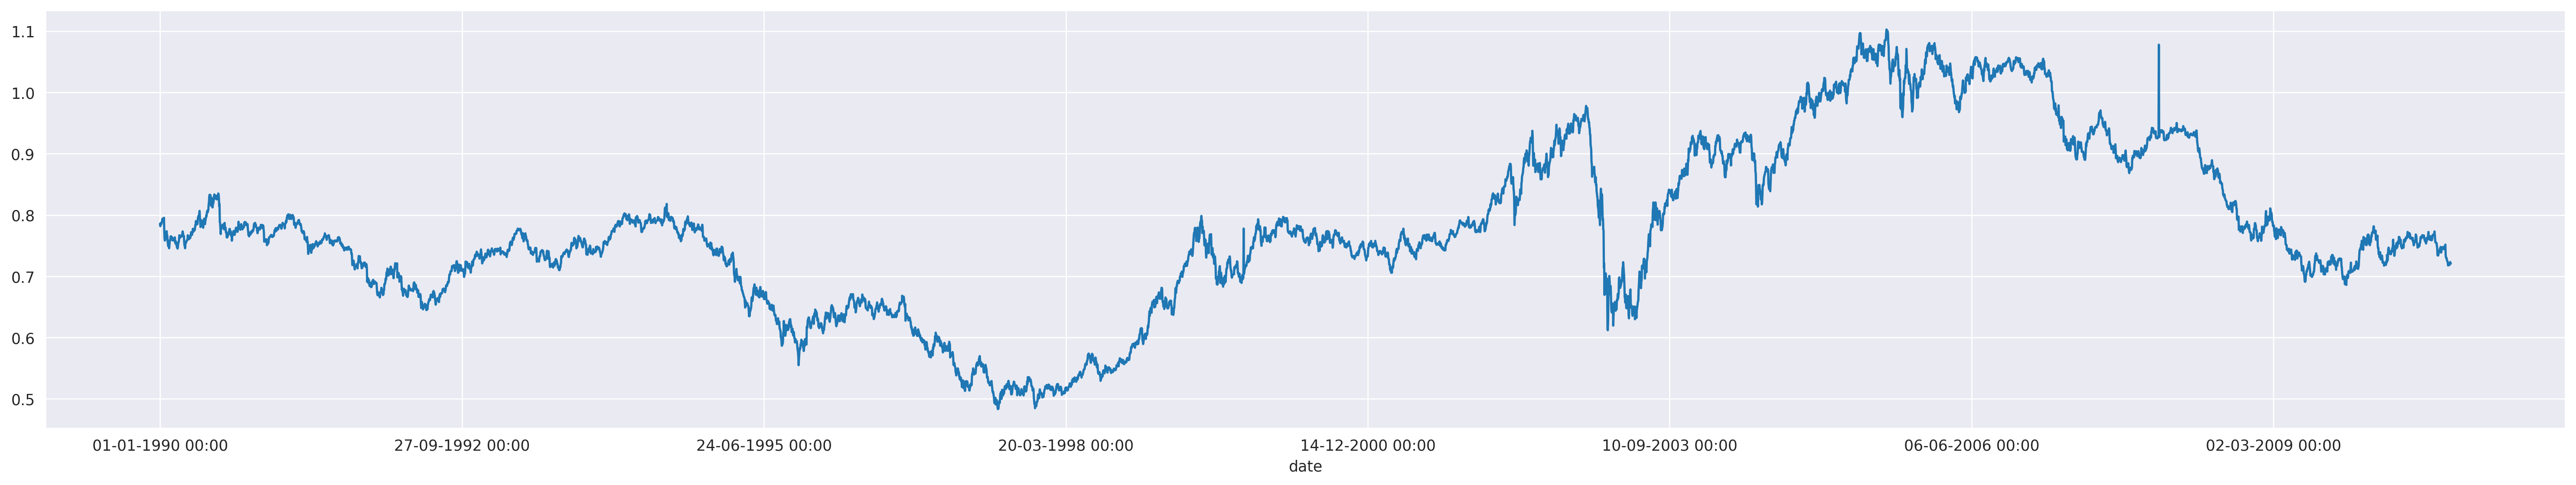

In [15]:
df['Ex_rate'].plot()

In [16]:
adfuller(df['Ex_rate'])[1]

0.4492327353597477

In [17]:
order = auto_arima(df['Ex_rate'])

In [18]:
order

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [19]:
df.shape

(7588, 1)

In [20]:
train = df.iloc[:-30]
test = df.iloc[-30:]

In [21]:
train.shape

(7558, 1)

In [22]:
train

,Ex_rate
date,
01-01-1990 00:00,0.785500
02-01-1990 00:00,0.781800
03-01-1990 00:00,0.786700
04-01-1990 00:00,0.786000
05-01-1990 00:00,0.784900
...,...
06-09-2010 00:00,0.747831
07-09-2010 00:00,0.746436
08-09-2010 00:00,0.738662


In [23]:
test.shape

(30, 1)

In [24]:
model = ARIMA(train['Ex_rate'], order=(1, 0, 5)).fit()

In [25]:
test

,Ex_rate
date,
11-09-2010 00:00,0.745796
12-09-2010 00:00,0.745045
13-09-2010 00:00,0.747692
14-09-2010 00:00,0.745601
15-09-2010 00:00,0.747680
16-09-2010 00:00,0.744602
17-09-2010 00:00,0.744158
18-09-2010 00:00,0.745184
19-09-2010 00:00,0.744990


In [26]:
train.tail()

,Ex_rate
date,
06-09-2010 00:00,0.747831
07-09-2010 00:00,0.746436
08-09-2010 00:00,0.738662
09-09-2010 00:00,0.741125
10-09-2010 00:00,0.744546


In [27]:
test

,Ex_rate
date,
11-09-2010 00:00,0.745796
12-09-2010 00:00,0.745045
13-09-2010 00:00,0.747692
14-09-2010 00:00,0.745601
15-09-2010 00:00,0.747680
16-09-2010 00:00,0.744602
17-09-2010 00:00,0.744158
18-09-2010 00:00,0.745184
19-09-2010 00:00,0.744990


In [28]:
train

,Ex_rate
date,
01-01-1990 00:00,0.785500
02-01-1990 00:00,0.781800
03-01-1990 00:00,0.786700
04-01-1990 00:00,0.786000
05-01-1990 00:00,0.784900
...,...
06-09-2010 00:00,0.747831
07-09-2010 00:00,0.746436
08-09-2010 00:00,0.738662


In [29]:
ypred = model.predict(start =1791, end = 1820)
ypred

,predicted_mean
date,
27-11-1994 00:00,0.776969
28-11-1994 00:00,0.777867
29-11-1994 00:00,0.776716
30-11-1994 00:00,0.775005
01-12-1994 00:00,0.774373
02-12-1994 00:00,0.774254
03-12-1994 00:00,0.782708
04-12-1994 00:00,0.780043
05-12-1994 00:00,0.766738


In [30]:
print(np.sqrt(mean_squared_error(test['Ex_rate'], ypred)))

0.030626728716814745


In [31]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [32]:
model = ExponentialSmoothing(
    df['Ex_rate'],
    seasonal_periods=12,
    trend='add',
    seasonal='add',
    initialization_method='estimated'
)
hw_fit = model.fit()

In [33]:
(hw_fit.params)

{'smoothing_level': 0.8702070869039444,
 'smoothing_trend': 3.217866358981003e-19,
 'smoothing_seasonal': 0.0,
 'damping_trend': nan,
 'initial_level': 0.7860287247629244,
 'initial_trend': -1.81728819253526e-05,
 'initial_seasons': array([-0.00075936, -0.00070007, -0.00072147, -0.00045419, -0.00051668,
        -0.00071629, -0.00103311, -0.00075677, -0.00090048, -0.00075959,
        -0.00068156, -0.00095841]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

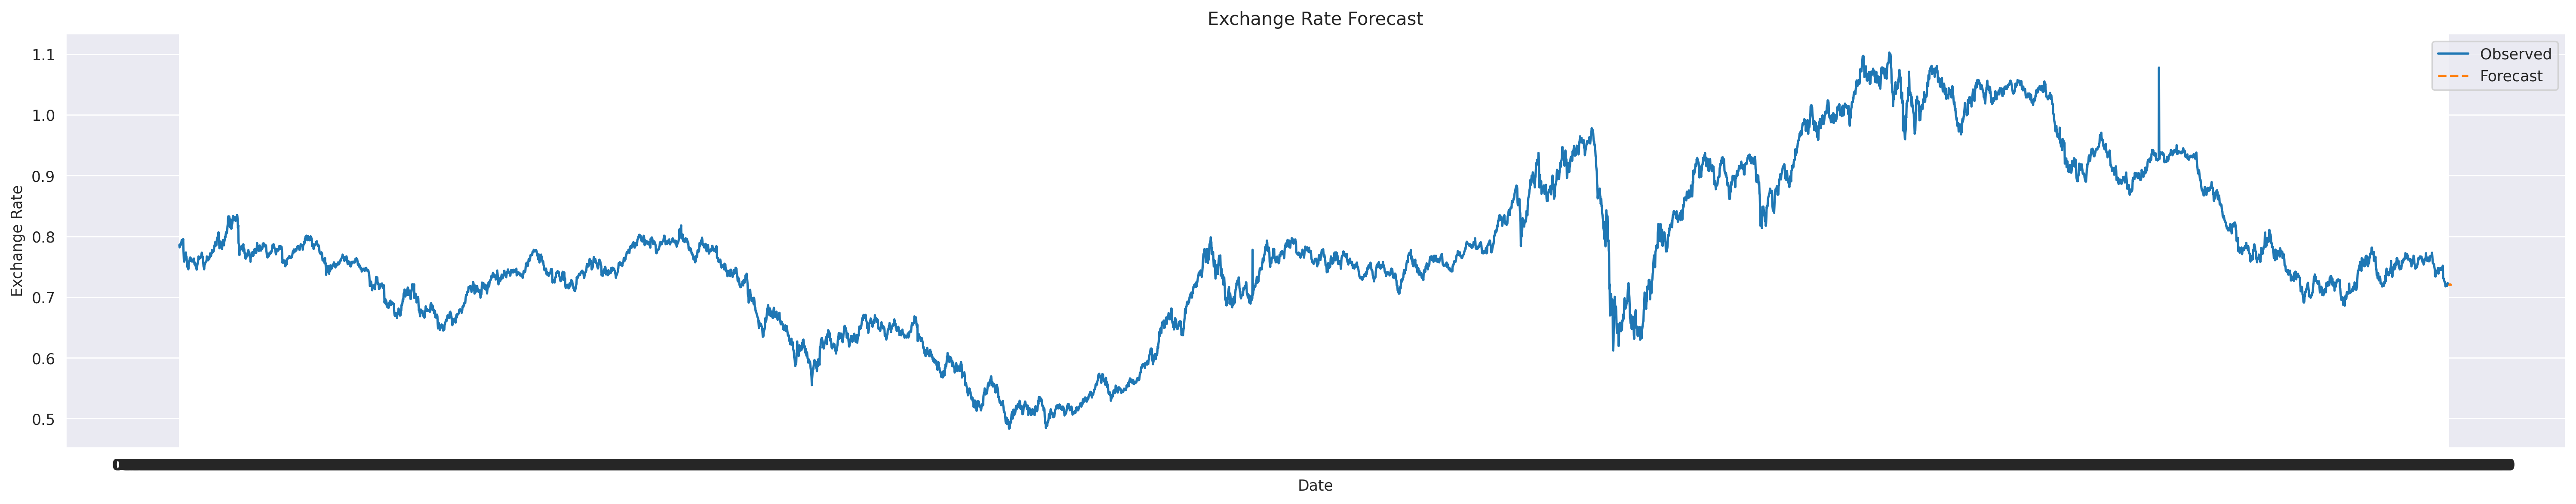

In [34]:
forecast = hw_fit.forecast(steps=12)

# Plot the data and forecast
plt.plot(df.index, df['Ex_rate'], label='Observed')
plt.plot(forecast.index, forecast, label='Forecast', linestyle='--')
plt.title('Exchange Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()